In [95]:
#!pip3 install matplotlib
#!pip3 install numpy

In [96]:
import json
import matplotlib.pyplot as plt
import numpy as np

#setting the dynamic path so we can access any data on demand
src_path = '../DataSet/assignment1_submissions/'

In [97]:
#assigning the specific file path
file_name = 'assignment1-22.submit'
src_path += file_name

with open(src_path, 'r') as assignmentFile:
    json_data = json.load(assignmentFile)

    # Extract the "log" field from the parsed JSON
    log_field = json_data['submission']['logs'][0]['log']
   

In [98]:
# Split the log_field into individual JSON objects
logs = log_field.strip().split('\n')

# Define dictionaries to hold information for each timestamp
knowledge_base = {}

# Iterate over each log entry
for log in logs:
    data = json.loads(log)
    timestamp = data.get('t')
    cell_number = data.get('u')
    new_value = data.get('v')
    insert_data = data.get('^')
    cursor_position = data.get('|')
    cursor_position_in_file = data.get('_c')
    total_chars_in_file = data.get('_cs')
    current_line_number = data.get('_l')
    total_lines_in_file = data.get('_ls')

    knowledge_base[timestamp] = {
        'cell_number': cell_number,
        'new_value': new_value,
        'insert_data': insert_data,
        'cursor_position': cursor_position,
        'cursor_position_in_file': cursor_position_in_file,
        'total_chars_in_file': total_chars_in_file,
        'current_line_number': current_line_number,
        'total_lines_in_file': total_lines_in_file
    }

In [99]:
#extracting the x as timestamp and y as total chars in file

x = []
y = []

temp = 0

for timestamp, comment_data in knowledge_base.items():
    x.append(timestamp)
    if comment_data["total_chars_in_file"] is None:
        y.append(temp)
    else:
        temp = comment_data["total_chars_in_file"]
        y.append(comment_data["total_chars_in_file"])

In [100]:
# x = []
# y = []

# tempChar, tempCell = 0, 0

# for timestamp, comment_data in knowledge_base.items():
#     x.append(timestamp)
#     if comment_data["total_chars_in_file"] is not None:
#         tempChar = comment_data["total_chars_in_file"]
#         if tempCell is not None:
#             tempCell = comment_data["cell_number"]
#             print(tempCell)

#     y.append(tempChar)

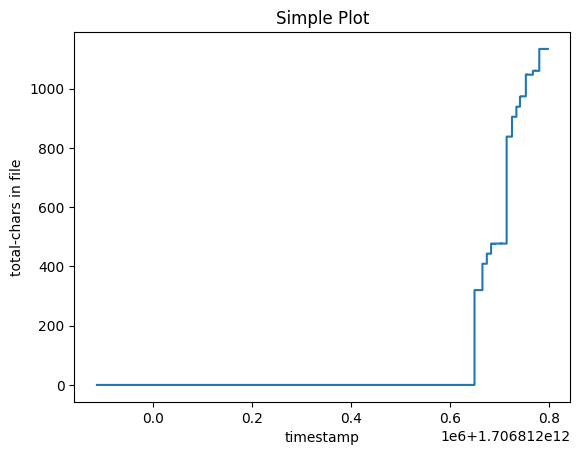

In [101]:
# plotting the data 
plt.plot(x, y) 
  
# Adding the title 
plt.title("Simple Plot") 
  
# Adding the labels 
plt.ylabel("total-chars in file") 
plt.xlabel("timestamp") 
plt.show()

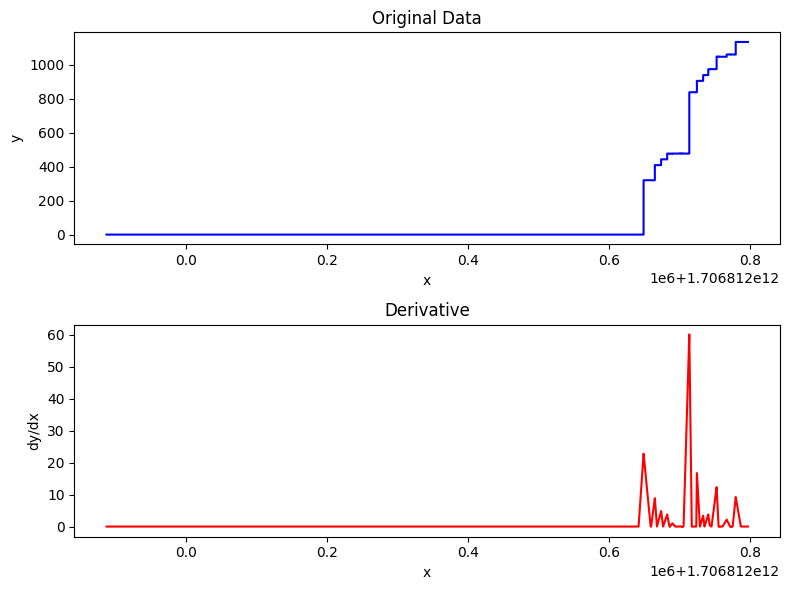

In [102]:
# Compute the derivative dy/dx
dy_dx = np.gradient(y, x)

# Plotting the data
plt.figure(figsize=(8, 6))

# Original data
plt.subplot(2, 1, 1)
plt.plot(x, y, color='blue')
plt.title("Original Data")
plt.xlabel("x")
plt.ylabel("y")

# Derivative data
plt.subplot(2, 1, 2)
plt.plot(x, dy_dx, color='red')
plt.title("Derivative")
plt.xlabel("x")
plt.ylabel("dy/dx")

plt.tight_layout()
plt.show()

In [103]:
# Print the knowledge_base
for timestamp, comment_data in knowledge_base.items():
    print(f'Timestamp: {timestamp}')
    print(f'Cell Number: {comment_data["cell_number"]}')
    print(f'New Value: {comment_data["new_value"]}')
    print(f'Insert Data: {comment_data["insert_data"]}')
    print(f'Cursor Position: {comment_data["cursor_position"]}')
    print(f'Cursor Position in File: {comment_data["cursor_position_in_file"]}')
    print(f'Total Chars in File: {comment_data["total_chars_in_file"]}')
    print(f'Current Line Number: {comment_data["current_line_number"]}')
    print(f'Total Lines in File: {comment_data["total_lines_in_file"]}')
    print('---------------------------')

Timestamp: 1706811887326
Cell Number: 0
New Value: 
Insert Data: None
Cursor Position: None
Cursor Position in File: None
Total Chars in File: None
Current Line Number: None
Total Lines in File: None
---------------------------
Timestamp: 1706812642101
Cell Number: 0
New Value: None
Insert Data: None
Cursor Position: 0
Cursor Position in File: 0
Total Chars in File: 0
Current Line Number: 0
Total Lines in File: 1
---------------------------
Timestamp: 1706812642136
Cell Number: 0
New Value: None
Insert Data: None
Cursor Position: 0
Cursor Position in File: 0
Total Chars in File: 0
Current Line Number: 0
Total Lines in File: 1
---------------------------
Timestamp: 1706812649234
Cell Number: 0
New Value: None
Insert Data: [0, 0, 'class Dog:\n    def __init__(self,name, age, breed):\n        self.name = name\n        self.age = age\n        self.breed = breed\n    \n    def talk(self):\n        print (f"{self.name} says woof")\n        \n    def come(self):\n        print(f"{self.name} r